In [29]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [8]:
df5 = pd.read_csv(r"/Users/ABINASH/Desktop/ABINASH DS/VS Code/Industrial_Copper_new_1).csv")

In [3]:
df5.dtypes

country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity tons log      float64
customer log           float64
thickness log          float64
selling_price log      float64
item_date_day            int64
item_date_month          int64
item_date_year           int64
delivery_date_day        int64
delivery_date_month      int64
delivery_date_year       int64
dtype: object

In [4]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [5]:
df_class = df5.copy()

In [6]:
df_c = df_class[(df_class["status"]==1)|(df_class["status"]==0)]

In [7]:
df_c.tail()

,country,status,item type,application,width,product_ref,quantity tons log,customer log,thickness log,selling_price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
181668,25.0,0,3.0,15.0,1980.0,640665,3.472467,17.224270,1.791759,6.313548,2,7,2020,1,8,2020
181669,30.0,0,3.0,10.0,1525.0,640665,4.196171,17.222079,1.348073,6.126869,2,7,2020,1,8,2020
181670,30.0,0,3.0,10.0,1525.0,640665,4.156686,17.222079,1.766442,6.124683,2,7,2020,1,8,2020
181671,30.0,0,3.0,10.0,1500.0,640665,4.025862,17.222079,2.060514,6.126869,2,7,2020,1,8,2020
181672,30.0,0,3.0,10.0,1830.0,640665,5.328963,17.222079,1.348073,6.131226,2,7,2020,1,8,2020


In [8]:
df_c.value_counts("status")

status
1    116012
0     34438
Name: count, dtype: int64

In [9]:
# Now the Data is Imbalanced. So Further i do the Resampling method to balance the data

In [10]:
x= df_c.drop(columns=["status"], axis=1)
y= df_c["status"]

In [11]:
x.shape, y.shape

((150450, 15), (150450,))

In [12]:
x_new, y_new = SMOTETomek().fit_resample(x,y)

In [13]:
x_new.shape, y_new.shape

((230136, 15), (230136,))

In [14]:
y_new.value_counts()

status
1    115068
0    115068
Name: count, dtype: int64

In [15]:
# Now the data is Balanced
# can continue the ML Prediction

In [16]:
def accuracy_checking(x_data,y_data,alghorithm):
  # train test spliting
  x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size=0.2,random_state=42)

  model = alghorithm().fit(x_train,y_train)

  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)

  metrics = {"Alghorithm": alghorithm.__name__,
             "Accuracy_Train": train_acc,
             "Accuracy_Test": test_acc}

  return metrics


In [17]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Alghorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9481222997673646}
{'Alghorithm': 'RandomForestClassifier', 'Accuracy_Train': 0.9999916915918909, 'Accuracy_Test': 0.9701229644400133}
{'Alghorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9727151877700233}


c:\Users\ABINASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Alghorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8146975739448322, 'Accuracy_Test': 0.8153871718178797}
{'Alghorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8351362578929877, 'Accuracy_Test': 0.8390162844798936}
{'Alghorithm': 'XGBClassifier', 'Accuracy_Train': 0.9469425058158857, 'Accuracy_Test': 0.93678963110668}


In [18]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Alghorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9618275832102199}
{'Alghorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9819457721386982}
{'Alghorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9848787694446859}


c:\Users\ABINASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Alghorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7770982249549178, 'Accuracy_Test': 0.7757451985747805}
{'Alghorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8197905577161232, 'Accuracy_Test': 0.81698096810637}
{'Alghorithm': 'XGBClassifier', 'Accuracy_Train': 0.9528374649662155, 'Accuracy_Test': 0.947662292517598}


In [19]:
# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# so we want the reduce the overfitting.
# RandomForestClassifier is good interpretability, so i select this algorithm

In [20]:
# Get the high accuracy when using Hyperparameter Tuning method from GridsearchCV
x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.4, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= 3,verbose=3)
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [21]:
gridsearch.cv_results_

{'mean_fit_time': array([ 21.34391594,  21.19846272,  21.06800289,  21.12891355,
         21.52250676,  22.35039253,  22.51454115,  23.27710986,
         23.36565027,  25.97183728,  26.08471532,  27.07868967,
         28.0966361 ,  26.44223547,  26.71745558,  26.72363043,
         26.41588459,  26.79193687,  83.1527566 ,  82.8678247 ,
         83.14139647,  82.32415085,  84.05989728,  77.10095959,
         75.74620247,  75.64691501,  75.14133744,  48.76362963,
         49.55871267,  48.73569984,  48.68995738,  48.53692122,
         48.78827887,  49.14775562,  48.95344987,  49.22272983,
         48.88317628,  48.99872928,  49.3052249 ,  48.62395802,
         48.91797705,  48.7777143 ,  49.02714443,  49.27885499,
         48.93897285, 176.00594811, 178.069978  , 176.41180921,
        178.00799508, 176.47054305, 176.90513382, 175.72866778,
        176.10993891, 179.93916245,  82.85376678,  83.56455646,
         82.3478806 ,  82.00247436,  83.48148069,  83.26777711,
         82.5236805 ,  

In [22]:
gridsearch.best_score_

0.9647960244124743

In [23]:
gridsearch.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [24]:
# Passing the best Hypertuning paramers in the ,
# RandomForest algorithm and check the accuracy for training and testing

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9862797922958264
Accuracy_Test:  0.9685191622490658
  
Confution_matrix for Test
--------------------------
[[22751   404]
 [ 1045 21828]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23155
           1       0.98      0.95      0.97     22873

    accuracy                           0.97     46028
   macro avg       0.97      0.97      0.97     46028
weighted avg       0.97      0.97      0.97     46028



In [26]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [27]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.01744764 1.        ]
[0.         0.95431295 1.        ]
 
auc_curve: 0.9684326549471204


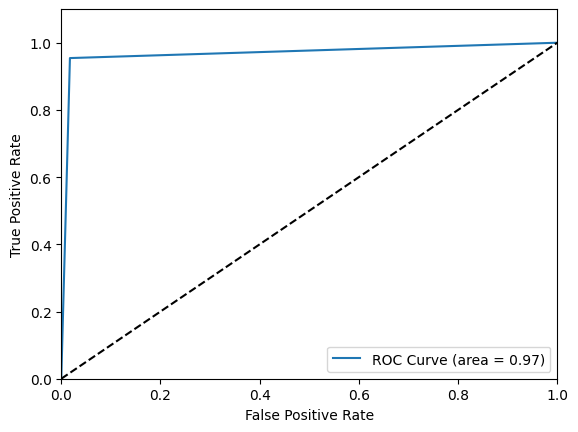

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming FP, TP, and auc_curve are already defined
roc_point = f"ROC Curve (area = {round(auc_curve, 2)})"
plt.plot(FP, TP, label=roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.legend(loc="lower right")
plt.show()


In [32]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


c:\Users\ABINASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [10]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

with open(r'C:\Users\ABINASH\Desktop\ABINASH DS\VS Code\Classification_model.pkl',"rb") as f1:
  class_model= pickle.load(f1)

In [4]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user= class_model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


c:\Users\ABINASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


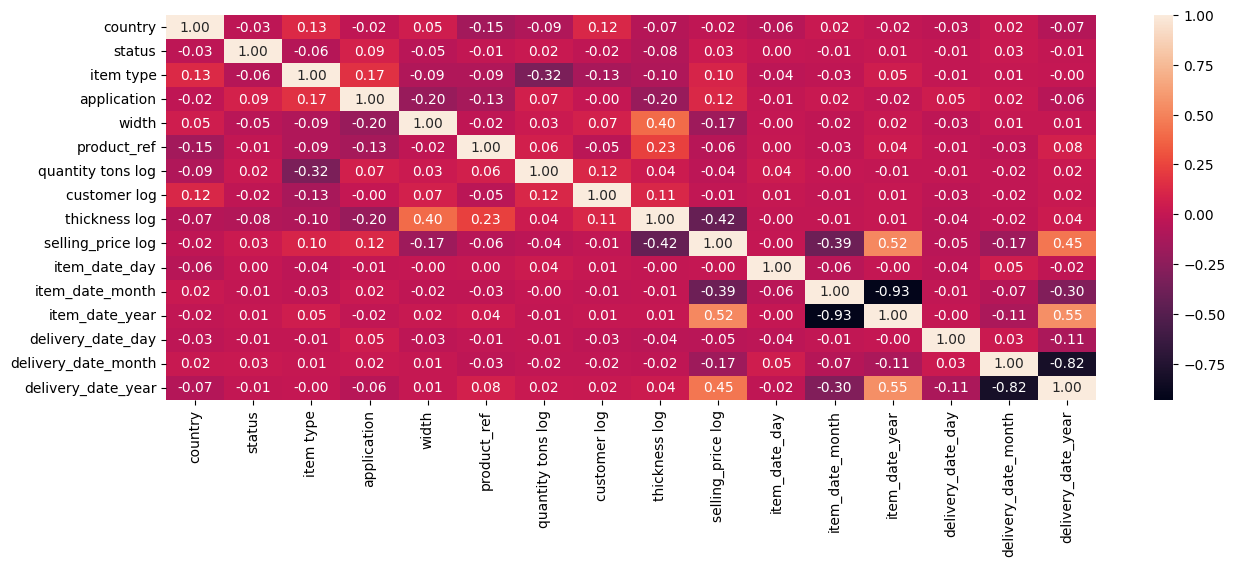

In [11]:
corr= df5.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot= True, fmt="0.2f")
plt.show()

<!-- Regression Method - Predict the Selling Price -->

In [12]:
#packages

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [13]:
df_regg= df5.copy()

In [18]:
#Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):

  x= df.drop(columns=["selling_price log"], axis=1)
  y= df["selling_price log"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [19]:
print(accuracy_regressor(df_regg, DecisionTreeRegressor))
print(accuracy_regressor(df_regg, RandomForestRegressor))
print(accuracy_regressor(df_regg, ExtraTreesRegressor))
print(accuracy_regressor(df_regg, AdaBoostRegressor))
print(accuracy_regressor(df_regg, GradientBoostingRegressor))
print(accuracy_regressor(df_regg, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.9999167013355934, 'R2_Test': 0.9281358006913228}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9939806060816077, 'R2_Test': 0.9571859431242479}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.9999167013355934, 'R2_Test': 0.9558470710968634}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.6769913670279519, 'R2_Test': 0.6800574594651569}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.8882022415454391, 'R2_Test': 0.8858376503219276}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.9518278516247769, 'R2_Test': 0.9461540957741942}


In [ ]:
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [21]:
x= df_regg.drop(columns=["selling_price log"], axis=1)
y= df_regg["selling_price log"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.4, random_state= 42)

parameters_r= {"max_depth": [2,4,10,20],
               "min_samples_split": [2,5,10],
               "min_samples_leaf": [1,2,4],
               "max_features": ["sqrt","log2",None]}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [22]:
gridsearch_r.cv_results_

{'mean_fit_time': array([ 11.24126129,  12.05155869,  13.16622815,  12.49219618,
         11.75137458,  11.68814816,  11.72030282,  11.50305543,
         11.51020546,  11.43891158,  11.61760335,  11.37240686,
         11.42370014,  11.53271484,  11.49030724,  11.48935504,
         11.73072596,  11.30513554,  35.76260505,  36.0322288 ,
         35.83482575,  36.05360584,  36.09601574,  35.6785471 ,
         35.56771541,  35.46463609,  36.07170091,  20.58108721,
         20.62293181,  20.5726553 ,  20.96666708,  20.68469968,
         20.67904177,  20.72537723,  20.60747857,  21.04627047,
         21.64216547,  20.91704273,  20.7369442 ,  21.08669162,
         20.69301887,  20.56213088,  21.17934065,  20.68711529,
         20.75111165,  68.79457994,  69.12727542,  68.20624576,
         68.59264369,  67.88574643,  67.8150095 ,  67.94287181,
         67.96885262,  68.91224747,  42.1836679 ,  42.14681683,
         42.0543879 ,  42.34958935,  42.97445006,  42.0591887 ,
         41.65751657,  

In [23]:
gridsearch_r.best_score_

0.9482125197643667

In [24]:
gridsearch_r.best_score_

0.9482125197643667

In [25]:
gridsearch_r.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [27]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_regg.drop(columns=['selling_price log'], axis=1)
y = df_regg['selling_price log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9865422186007919, 0.9561828923220728)

In [29]:
#predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_regg.drop(columns=['selling_price log'], axis=1)
y = df_regg['selling_price log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9562947246268529,
 'Mean Absolute Error': 0.032059462431111345,
 'Mean Squared Error': 0.0028755925321447664,
 'Root Mean Squared Error': 0.05362455157989451}

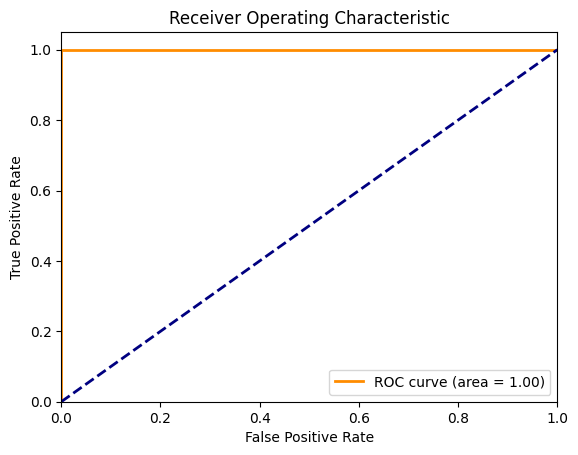

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [30]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  7.149704737683554
Predicted selling price without Log:  1273.7298152304395


c:\Users\ABINASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [31]:
import pickle

In [32]:
with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)

In [33]:
with open(r"C:\Users\ABINASH\Desktop\ABINASH DS\VS Code\Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [34]:
df5.head()

,country,status,item type,application,width,product_ref,quantity tons log,customer log,thickness log,selling_price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30.0,1,6.0,28.0,952.0,628377,5.956169,17.221827,-0.967584,6.468211,1,4,2021,18,4,2021
1,32.0,1,3.0,59.0,1317.0,1668701718,5.310301,17.228293,0.832909,6.643790,1,4,2021,18,4,2021
2,28.0,1,5.0,10.0,1980.0,640665,6.666354,17.223735,1.386294,6.357842,1,4,2021,1,4,2021
3,32.0,1,5.0,41.0,1220.0,611993,4.730808,17.228050,-0.385662,6.836259,1,4,2021,18,4,2021
4,32.0,1,5.0,41.0,1220.0,611993,4.736160,17.228050,-0.597837,6.860664,1,4,2021,18,4,2021


In [35]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.807201946321778
Predicted selling price without Log:  904.3368804349179


c:\Users\ABINASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
